In [65]:
import numpy as np
import pandas as pd
from cmdstanpy import CmdStanModel, write_stan_json
import arviz as az
import matplotlib.pyplot as plt
import preliz as pz
from patsy import dmatrix
az.style.use("arviz-darkgrid")

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/bambinos/bambi/ff685b75a0ef17a11c8399de6de0a5f9d388d231/docs/notebooks/data/bmi.csv")

In [6]:
df.head()

,age,bmi
0,0.03,13.235289
1,0.04,12.438775
2,0.04,14.541775
3,0.04,11.773954
4,0.04,15.325614


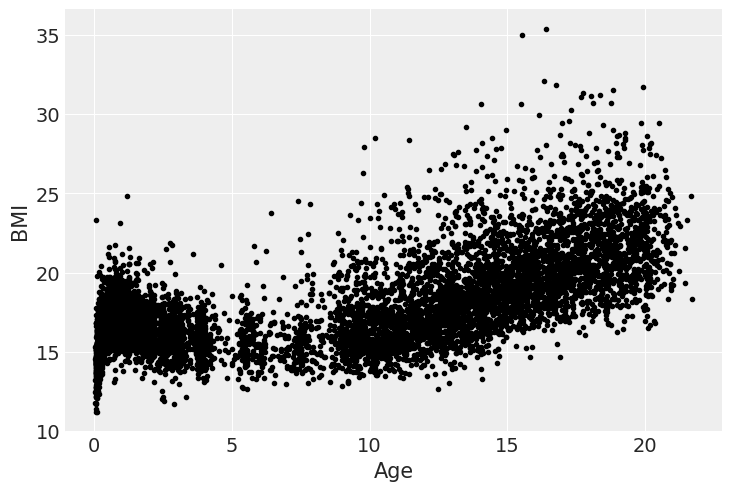

In [66]:
plt.plot(df.age, df.bmi, "k.");
plt.xlabel("Age")
plt.ylabel("BMI");

In [15]:
quantiles = np.array([0.1, 0.5, 0.9])
knots = np.quantile(df.age, np.linspace(0, 1, 10))[1:-1]

In [49]:
X = np.asarray(dmatrix( "0 + bs(age, knots=knots)", data =df))
bs_sigma = np.array([14.4682, 13.1507,
                10.6481, 17.5256, 15.7426, 10.6109, 11.8021, 11.3622, 14.399,
             19.4878, 44.2918])

In [56]:
d = {'N': len(df),
     'K': X.shape[1],
     'X': X,
     'y': df['bmi'].values,
     "tau": .1,
     "bs_sigma": bs_sigma
     }

In [58]:
model = CmdStanModel(stan_file="stanfiles/quantile.stan", cpp_options={'STAN_THREADS': 'TRUE'},
                     force_compile = True)     

23:19:54 - cmdstanpy - INFO - compiling stan file /home/harrison/Desktop/gitHubRepos/HPCStatsPortfolio/PythonProjects/Bayesian_stats/bambiExamps/stanfiles/quantile.stan to exe file /home/harrison/Desktop/gitHubRepos/HPCStatsPortfolio/PythonProjects/Bayesian_stats/bambiExamps/stanfiles/quantile


23:20:19 - cmdstanpy - INFO - compiled model executable: /home/harrison/Desktop/gitHubRepos/HPCStatsPortfolio/PythonProjects/Bayesian_stats/bambiExamps/stanfiles/quantile


In [59]:
write_stan_json("/home/harrison/Desktop/gitHubRepos/HPCStatsPortfolio/PythonProjects/Bayesian_stats/bambiExamps/data.json", data = d)

In [62]:
fit = model.sample("data.json", chains = 4 , iter_sampling=1000, parallel_chains = 4)

23:34:28 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:03 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |█▎        | 00:07 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |█▊        | 00:10 Iteration:  200 / 2000 [ 10%]  (Warmup)
chain 1 |██▎       | 00:12 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |██▋       | 00:16 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:19 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:22 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:25 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:27 Iteration:  800 / 2000 [ 40%]  (Warmup)


chain 1 |█████     | 00:35 Iteration:  900 / 2000 [ 45%]  (Warmup)




chain 1 |█████▉    | 00:43 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:50 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:57 Iteration: 1200 / 2000 [ 60%]  (Sampling)


cha


23:36:21 - cmdstanpy - INFO - CmdStan done processing.
23:36:21 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: skew_double_exponential_lpdf: Scale parameter is inf, but must be positive finite! (in 'quantile.stan', line 29, column 0 to column 44)
	Exception: skew_double_exponential_lpdf: Scale parameter is inf, but must be positive finite! (in 'quantile.stan', line 29, column 0 to column 44)
	Exception: skew_double_exponential_lpdf: Scale parameter is 0, but must be positive finite! (in 'quantile.stan', line 29, column 0 to column 44)
	Exception: skew_double_exponential_lpdf: Scale parameter is inf, but must be positive finite! (in 'quantile.stan', line 29, column 0 to column 44)
	Exception: skew_double_exponential_lpdf: Scale parameter is 0, but must be positive finite! (in 'quantile.stan', line 29, column 0 to column 44)
	Exception: skew_double_exponential_lpdf: Scale parameter is inf, but must be positive finite! (in 'quantile.stan', line 29, column 0 to column

In [67]:
az.summary(fit, var_names=["sigma", "beta", "intercept"])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,0.570,0.007,0.557,0.582,0.000,0.000,3164.0,2334.0,1.0
beta[0],2.926,0.219,2.526,3.350,0.007,0.005,895.0,1284.0,1.0
beta[1],4.310,0.146,4.019,4.580,0.004,0.003,1307.0,1358.0,1.0
beta[2],2.766,0.173,2.446,3.087,0.005,0.004,1052.0,1602.0,1.0
beta[3],1.697,0.200,1.323,2.067,0.005,0.004,1437.0,1709.0,1.0
beta[4],1.853,0.211,1.444,2.230,0.006,0.004,1218.0,1786.0,1.0
beta[5],3.034,0.172,2.731,3.379,0.005,0.004,1170.0,1468.0,1.0
beta[6],3.752,0.176,3.438,4.084,0.005,0.004,1054.0,1678.0,1.0
beta[7],5.594,0.176,5.253,5.924,0.005,0.004,1211.0,1390.0,1.0
beta[8],6.243,0.233,5.788,6.655,0.007,0.005,1231.0,1732.0,1.0
